In [1]:
import pickle
import numpy as np
import os
import torch
import torch.nn as nn
import re
import sys
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import matplotlib.pyplot as plt

root = os.path.dirname(os.path.abspath(os.curdir))
sys.path.append(root)

from sr_model.models.models import AnalyticSR, STDP_SR, Linear, MLP
from datasets import inputs, sf_inputs_discrete
import seaborn as sns
import pandas as pd

from run_td_rnn import run as run_rnn
from run_td_mlp import run as run_mlp
from run_td_linear import run as run_linear

device = 'cpu'

# Load dataset choice

In [3]:
dataset = sf_inputs_discrete.Sim2DWalk
feature_maker_kwargs = {
    'feature_dim': 64, 'feature_vals': [0, 1]
    }
dataset_config = {
    'num_steps': 2000, 'num_states': 64,
    'feature_maker_kwargs': feature_maker_kwargs
    }
input_size = feature_maker_kwargs['feature_dim']
gamma = 0.8
seed = 0

# Calculate ground-truth T and M

In [4]:
np.random.seed(seed)
dset = dataset(**dataset_config)

In [ ]:
state_inputs = []
for state_input in dset.state_inputs.T:
    state_inputs.append(np.argwhere(state_input)[0,0])
state_inputs = np.array(state_inputs)

In [6]:
T = np.zeros((input_size, input_size))
for idx in range(state_inputs.size-1):
    s = state_inputs[idx]
    s_prime = state_inputs[idx+1]
    T[s, s_prime] += 1
T = T/(np.sum(T, axis=1)[:,None])

NameError: name 'input_size' is not defined

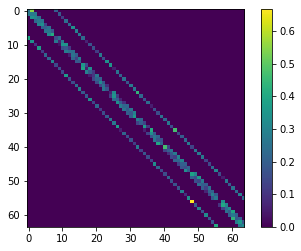

In [7]:
plt.figure()
plt.imshow(T)
plt.colorbar()
plt.show()

In [8]:
M = np.linalg.pinv(np.eye(T.shape[0])-gamma*T)

In [9]:
# Column is a feature
feature_map = dset.feature_maker.feature_map

# Run each model

In [357]:
rnn = AnalyticSR(
    num_states=input_size, gamma=gamma,
    ca3_kwargs={
        'use_dynamic_lr': False, 'lr':1E-3,
        'eigenval_offset': 0.5
        }
    )
np.random.seed(seed)
_, loss, _, _ = run_rnn(
    '../trained_models/test/', rnn, dataset,
    dataset_config, gamma=gamma
    )
print(loss)


[   51] loss: 0.132
Time per step 0.001s, net 0.072s

[  101] loss: 0.114
Time per step 0.002s, net 0.194s

[  151] loss: 0.101
Time per step 0.003s, net 0.352s

[  201] loss: 0.095
Time per step 0.004s, net 0.549s

[  251] loss: 0.094
Time per step 0.005s, net 0.786s

[  301] loss: 0.093
Time per step 0.006s, net 1.066s

[  351] loss: 0.092
Time per step 0.006s, net 1.389s

[  401] loss: 0.092
Time per step 0.008s, net 1.786s

[  451] loss: 0.093
Time per step 0.008s, net 2.209s

[  501] loss: 0.093
Time per step 0.009s, net 2.652s

[  551] loss: 0.093
Time per step 0.010s, net 3.156s

[  601] loss: 0.092
Time per step 0.011s, net 3.711s

[  651] loss: 0.093
Time per step 0.011s, net 4.277s

[  701] loss: 0.093
Time per step 0.013s, net 4.911s

[  751] loss: 0.093
Time per step 0.015s, net 5.650s

[  801] loss: 0.093
Time per step 0.015s, net 6.398s

[  851] loss: 0.094
Time per step 0.016s, net 7.194s

[  901] loss: 0.094
Time per step 0.016s, net 8.000s

[  951] loss: 0.093
Time pe

In [11]:
linear = Linear(input_size=input_size)
np.random.seed(seed)
_, loss, _, _ = run_linear(
    '../trained_models/test/', linear, dataset,
    dataset_config, gamma=gamma, lr=1E-2
    )
print(loss)


[   51] loss: 0.210
Time per step 0.001s, net 0.037s

[  101] loss: 0.163
Time per step 0.002s, net 0.129s

[  151] loss: 0.178
Time per step 0.003s, net 0.257s

[  201] loss: 0.181
Time per step 0.003s, net 0.424s

[  251] loss: 0.183
Time per step 0.006s, net 0.700s

[  301] loss: 0.186
Time per step 0.005s, net 0.968s

[  351] loss: 0.185
Time per step 0.006s, net 1.287s

[  401] loss: 0.190
Time per step 0.007s, net 1.653s

[  451] loss: 0.195
Time per step 0.008s, net 2.066s

[  501] loss: 0.202
Time per step 0.010s, net 2.589s

[  551] loss: 0.211
Time per step 0.012s, net 3.170s

[  601] loss: 0.199
Time per step 0.012s, net 3.770s

[  651] loss: 0.200
Time per step 0.014s, net 4.455s

[  701] loss: 0.201
Time per step 0.014s, net 5.146s

[  751] loss: 0.202
Time per step 0.016s, net 5.939s

[  801] loss: 0.210
Time per step 0.018s, net 6.845s

[  851] loss: 0.216
Time per step 0.018s, net 7.762s

[  901] loss: 0.217
Time per step 0.019s, net 8.711s

[  951] loss: 0.215
Time pe

In [12]:
mlp = MLP(input_size=input_size, hidden_size=input_size*2)
np.random.seed(seed)
_, loss, _, _ = run_mlp(
    '../trained_models/test/', mlp, dataset,
    dataset_config, gamma=gamma
    )
print(loss)


[   51] loss: 0.323
Time per step 0.002s, net 0.096s

[  101] loss: 0.133
Time per step 0.002s, net 0.207s

[  151] loss: 0.140
Time per step 0.002s, net 0.318s

[  201] loss: 0.127
Time per step 0.002s, net 0.432s

[  251] loss: 0.128
Time per step 0.003s, net 0.565s

[  301] loss: 0.123
Time per step 0.003s, net 0.692s

[  351] loss: 0.117
Time per step 0.003s, net 0.827s

[  401] loss: 0.121
Time per step 0.004s, net 1.008s

[  451] loss: 0.125
Time per step 0.003s, net 1.156s

[  501] loss: 0.122
Time per step 0.003s, net 1.316s

[  551] loss: 0.118
Time per step 0.004s, net 1.500s

[  601] loss: 0.115
Time per step 0.005s, net 1.755s

[  651] loss: 0.114
Time per step 0.005s, net 1.981s

[  701] loss: 0.114
Time per step 0.004s, net 2.167s

[  751] loss: 0.114
Time per step 0.004s, net 2.386s

[  801] loss: 0.114
Time per step 0.005s, net 2.618s

[  851] loss: 0.114
Time per step 0.005s, net 2.845s

[  901] loss: 0.114
Time per step 0.006s, net 3.132s

[  951] loss: 0.113
Time pe

In [18]:
ground_M = get_ground_M(M)
errors = []
for idx in range(dset.dg_inputs.shape[1]-1):
    phi_state = state_inputs[idx]
    phi_prime_state = state_inputs[idx+1]
    phi = feature_map[:,phi_state]
    
    psi = ground_M[phi_state]
    psi_prime = ground_M[phi_prime_state]
    
    expected = phi + gamma*psi_prime
    value = psi
    
    errors.append(np.mean(np.square(expected-value)))

In [19]:
np.mean(errors)

0.22128256939582652

# Compare estimated M for individual state

In [359]:
i = 2

In [360]:
def plot_M(M_i):
    M_i = np.tile(M_i, (5,1))
    plt.figure(figsize=(8,5))
    plt.imshow(M_i)
    plt.yticks([])
    plt.show()

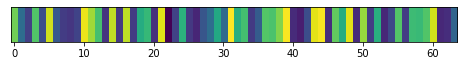

In [361]:
M_i = feature_map @ M[i]
plot_M(M_i)

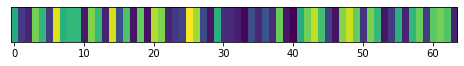

In [362]:
rnn_M_i = feature_map[i]@rnn.get_M().numpy()
plot_M(rnn_M_i)

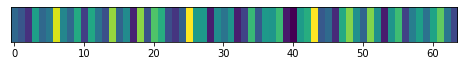

In [363]:
linear_M_i = feature_map[i]@linear.M[0].numpy()
plot_M(linear_M_i)

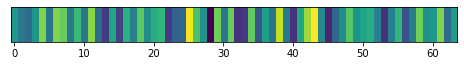

In [364]:
with torch.no_grad():
    mlp_M_i = mlp(torch.tensor(feature_map[i]).float())
plot_M(mlp_M_i.detach().numpy())

# Compare estimated M matrix

In [365]:
np.mean(np.abs(get_mlp_M(mlp) - get_ground_M(M)))

0.6599103767160515

In [366]:
np.mean(np.abs(get_linear_M(linear) - get_ground_M(M)))

0.7139756295098385

In [367]:
np.mean(np.abs(get_rnn_M(rnn) - get_ground_M(M)))

0.7122949469029389

In [17]:
def get_mlp_M(mlp):
    input_size = feature_map.shape[0]
    M = torch.zeros(input_size, input_size)
    for idx in range(input_size):
        probe = torch.tensor(feature_map[idx]).float()
        with torch.no_grad():
            M_row = mlp(probe)
        M[idx] = M_row
    return M.numpy()

def get_linear_M(linear):
    input_size = feature_map.shape[0]
    out_M = np.zeros((input_size, input_size))
    linear_M = linear.M[0].detach().numpy()
    for idx in range(input_size):
        out_M[idx] = feature_map[idx]@linear_M
    return out_M

def get_rnn_M(rnn):
    input_size = feature_map.shape[0]
    out_M = np.zeros((input_size, input_size))
    rnn_M = rnn.get_M().numpy()
    for idx in range(input_size):
        out_M[idx] = feature_map[idx]@rnn_M
    return out_M

def get_ground_M(M):
    input_size = feature_map.shape[0]
    true_M = np.zeros((input_size, input_size))
    for idx in range(input_size):
        true_M[idx] = feature_map@M[idx]
    return true_M

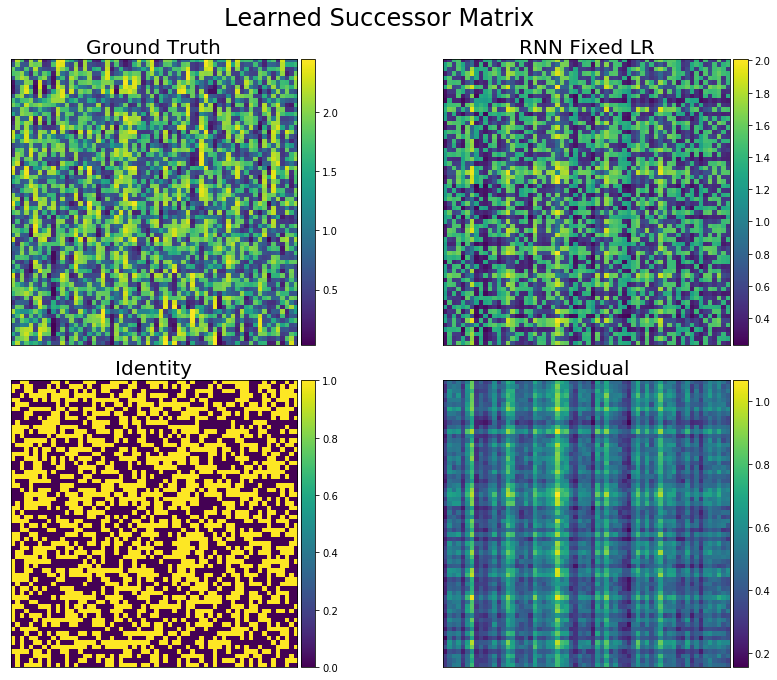

In [369]:
# Debugging RNN
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, axs = plt.subplots(2, 2, figsize=(6.4*2, 4.8*2))
axtitle_fontsize=20

# Ground Truth
divider = make_axes_locatable(axs[0,0])
cax = divider.append_axes('right', size='5%', pad=0.05)
im = axs[0,0].imshow(get_ground_M(M))
fig.colorbar(im, cax=cax, orientation='vertical')
axs[0,0].set_title('Ground Truth', fontsize=axtitle_fontsize)

# RNN
divider = make_axes_locatable(axs[0,1])
cax = divider.append_axes('right', size='5%', pad=0.05)
im = axs[0,1].imshow(get_rnn_M(rnn))
fig.colorbar(im, cax=cax, orientation='vertical')
axs[0,1].set_title('RNN Fixed LR', fontsize=axtitle_fontsize)

# Identity
divider = make_axes_locatable(axs[1,0])
cax = divider.append_axes('right', size='5%', pad=0.05)
im = axs[1,0].imshow(feature_map)
fig.colorbar(im, cax=cax, orientation='vertical')
axs[1,0].set_title('Identity', fontsize=axtitle_fontsize)

# Residual
divider = make_axes_locatable(axs[1,1])
cax = divider.append_axes('right', size='5%', pad=0.05)
im = axs[1,1].imshow(get_rnn_M(rnn)-feature_map)
fig.colorbar(im, cax=cax, orientation='vertical')
axs[1,1].set_title('Residual', fontsize=axtitle_fontsize)

for ax in axs.flatten():
    ax.set_xticks([])
    ax.set_yticks([])

plt.suptitle("Learned Successor Matrix", fontsize=24)
plt.tight_layout(rect=[0, 0., 1, 0.95])
plt.savefig('M_comparisons.png', dpi=150)
plt.show()

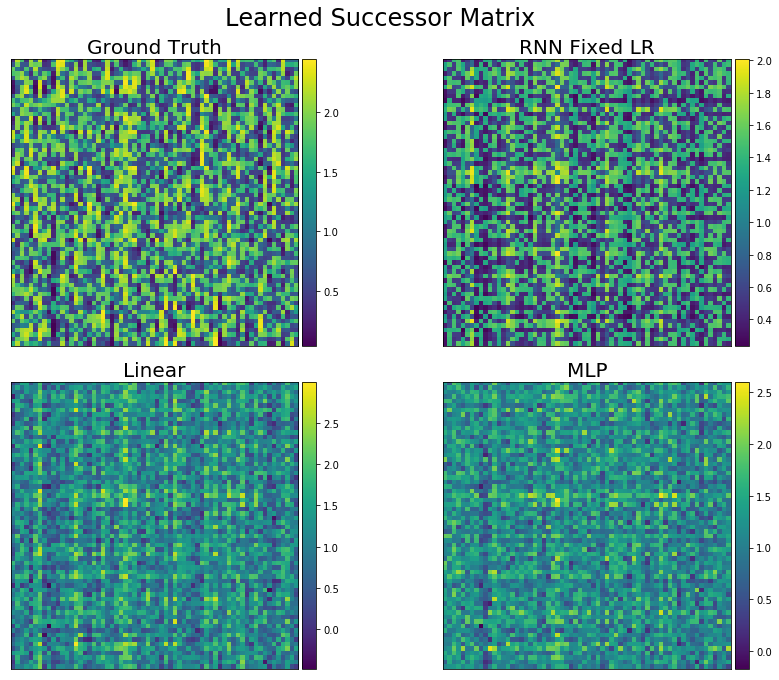

In [370]:
# Comparing Everything
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, axs = plt.subplots(2, 2, figsize=(6.4*2, 4.8*2))
axtitle_fontsize=20

# Ground Truth
divider = make_axes_locatable(axs[0,0])
cax = divider.append_axes('right', size='5%', pad=0.05)
im = axs[0,0].imshow(get_ground_M(M))
fig.colorbar(im, cax=cax, orientation='vertical')
axs[0,0].set_title('Ground Truth', fontsize=axtitle_fontsize)

# RNN
divider = make_axes_locatable(axs[0,1])
cax = divider.append_axes('right', size='5%', pad=0.05)
im = axs[0,1].imshow(get_rnn_M(rnn))
fig.colorbar(im, cax=cax, orientation='vertical')
axs[0,1].set_title('RNN Fixed LR', fontsize=axtitle_fontsize)

# Linear
divider = make_axes_locatable(axs[1,0])
cax = divider.append_axes('right', size='5%', pad=0.05)
im = axs[1,0].imshow(get_linear_M(linear))
fig.colorbar(im, cax=cax, orientation='vertical')
axs[1,0].set_title('Linear', fontsize=axtitle_fontsize)

# MLP
divider = make_axes_locatable(axs[1,1])
cax = divider.append_axes('right', size='5%', pad=0.05)
im = axs[1,1].imshow(get_mlp_M(mlp))
fig.colorbar(im, cax=cax, orientation='vertical')
axs[1,1].set_title('MLP', fontsize=axtitle_fontsize)

for ax in axs.flatten():
    ax.set_xticks([])
    ax.set_yticks([])

plt.suptitle("Learned Successor Matrix", fontsize=24)
plt.tight_layout(rect=[0, 0., 1, 0.95])
plt.savefig('M_comparisons.png', dpi=150)
plt.show()

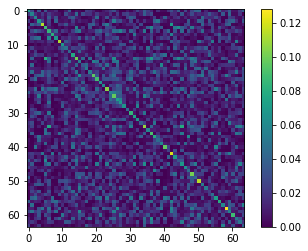

In [371]:
plt.figure()
plt.imshow(rnn.ca3.T.detach().numpy())
plt.colorbar()
plt.show()